In [1]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append("../")
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [3]:
from setenv import add_folders

In [4]:
add_folders(key="deepthought")

In [5]:
from utility_functions import define_dataset, training_phase_rUNet, inference_phase_rUNet, exclude_dist, inference_phase_rUNet_plot_notebook
import torch
from cUNet_pytorch_pooling import cUNet

In [6]:
%matplotlib inline

In [7]:
DATA_DIR_DEEPTHOUGHT="/storage/yw18581/data"
data_dir = DATA_DIR_DEEPTHOUGHT

In [8]:
folder = os.path.join(data_dir,"dataset", "averaged")

In [9]:
excluded = None

In [10]:
model_name = "../model/trained_cUNet_regression_validation_50epochs_coeff_mask0.75_batch16_on_npz.pkl"

In [31]:
data_loaders, data_lengths= define_dataset(folder, 
                                           batch_size=16, 
                                           excluded_list=excluded)

In [33]:
data_lengths

{'train': 0, 'val': 0, 'test': 0}

In [17]:
data_loader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=4)

In [18]:
model_inference.eval()
model_inference.to(device);

batch 1
1: true_dist: 10, pred_dist: [9.962244]


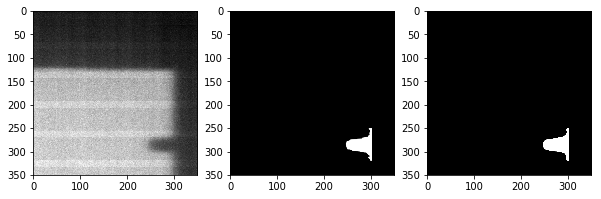

2: true_dist: 10, pred_dist: [9.848579]


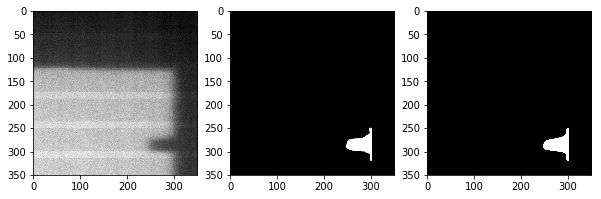

3: true_dist: 10, pred_dist: [9.780518]


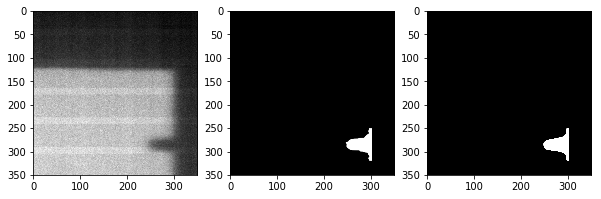

4: true_dist: 2, pred_dist: [1.7544291]


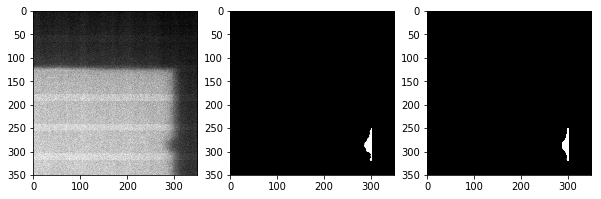

5: true_dist: 10, pred_dist: [10.008293]


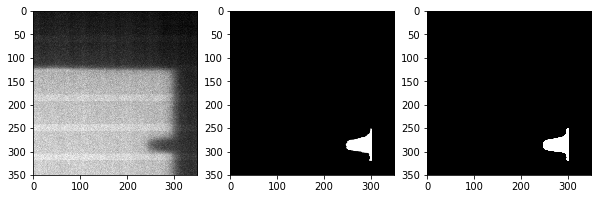

6: true_dist: 4, pred_dist: [4.0496125]


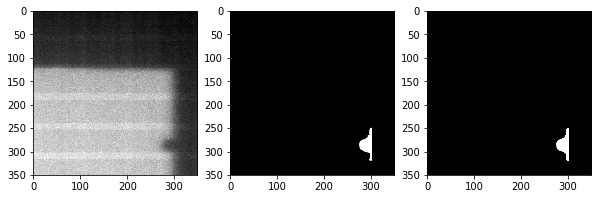

7: true_dist: 2, pred_dist: [1.881939]


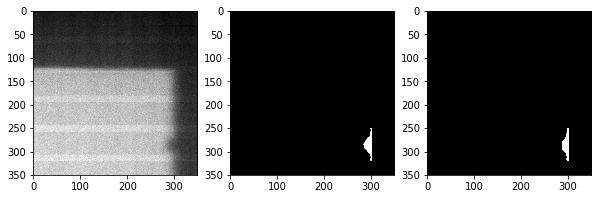

8: true_dist: 4, pred_dist: [3.8998082]


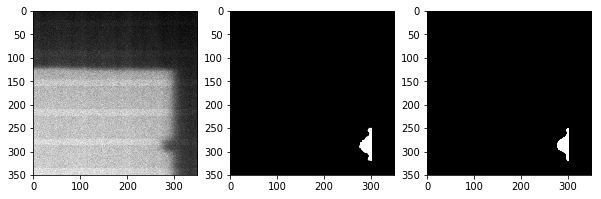

9: true_dist: 10, pred_dist: [9.782265]


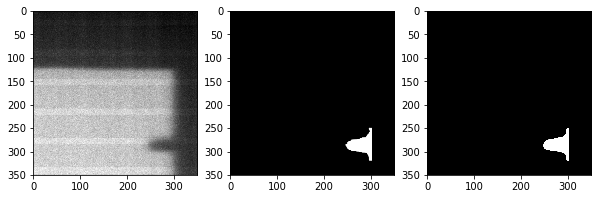

10: true_dist: 25, pred_dist: [24.73805]


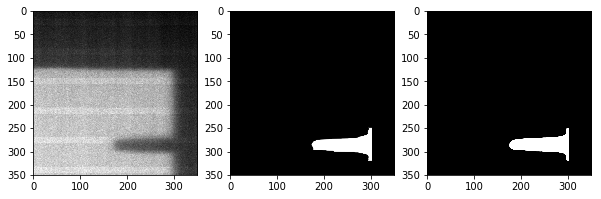

11: true_dist: 10, pred_dist: [9.868918]


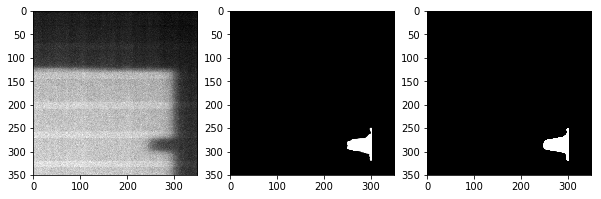

12: true_dist: 25, pred_dist: [24.898521]


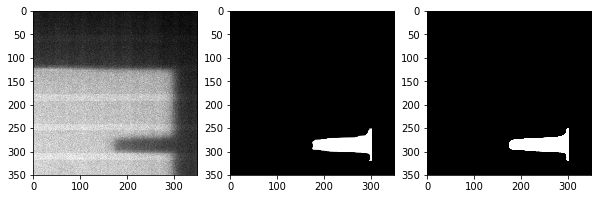

13: true_dist: 10, pred_dist: [9.710496]


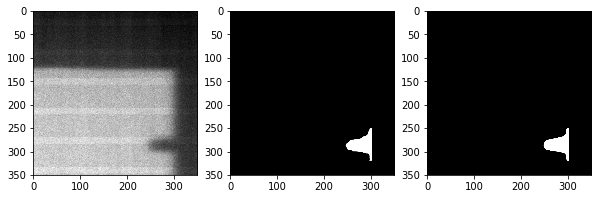

14: true_dist: 25, pred_dist: [25.105652]


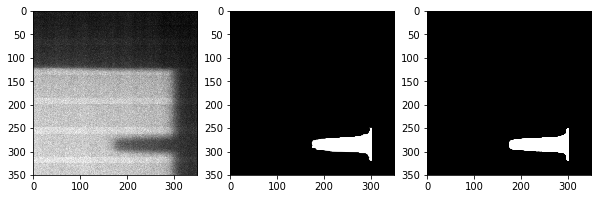

15: true_dist: 2, pred_dist: [1.8703483]


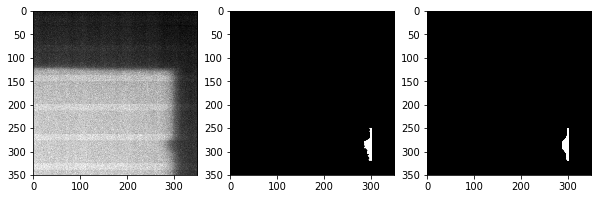

16: true_dist: 4, pred_dist: [4.1257367]


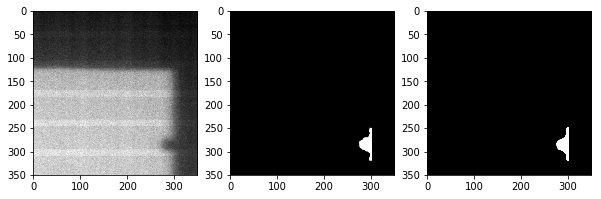

In [19]:
for i, batch in enumerate(data_loader):

    true_images, true_masks, true_dists = batch['image'], batch['mask'], batch['dist']
    pred_masks, pred_dists = model_inference(true_images.float().to(device))
    print("batch {}".format(i+1))
    for j, (img, tr_msk, tr_dist, pr_msk, pr_dist) in enumerate(zip(true_images,
                                                 true_masks, 
                                                 true_dists.cpu().detach().numpy(),
                                                 pred_masks.cpu().detach().numpy(), 
                                                 pred_dists.cpu().detach().numpy())):
    
        true_dist = tr_dist
        pred_dist = pr_dist
        print("{}: true_dist: {}, pred_dist: {}".format(j+1, true_dist, pred_dist))
        
        f = plt.figure(figsize=(10,5))
        f.add_subplot(1,3, 1)
        plt.imshow(img[0,...], cmap='gray')
        f.add_subplot(1,3, 2)
        plt.imshow(tr_msk[0,...], cmap='gray')
        f.add_subplot(1,3, 3)
        plt.imshow(pr_msk[0,...], cmap='gray')
        plt.show(block=True)
        
    break

In [19]:
batch_size=16

In [20]:
y_true = []
y_pred = []

for i, batch in tqdm(enumerate(data_loader), total = len(test_dataset)//batch_size, desc = "Mini Batch"):
    true_images, true_dists = batch['image'], batch['dist']
    _, pred_dists = model_inference(true_images.float().to(device))
#    print("batch {}".format(i + 1))
    for j, (img, tr_dist, pr_dist) in enumerate(zip(true_images,
                                                true_dists.cpu().detach().numpy(),
                                                pred_dists.cpu().detach().numpy())):
        true_dist = tr_dist
        pred_dist = pr_dist
        y_true.append(true_dist)
        y_pred.append(pred_dist)


In [21]:
y_true = np.asarray(y_true)
y_pred = np.asarray(y_pred).ravel()
print("mse: {}".format(mean_squared_error(y_true, y_pred)))

mse: 0.03649701292272869


In [ ]:
def get_idx(arr, key):
    return np.where(arr==key)[0]

In [ ]:
def idx_mse(dist, true_arr = y_true, preds_arr = y_pred):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse 

In [ ]:
distances = [2,4,10,25]

In [ ]:
errors = [idx_mse(i)[1] for i in distances]

np.savez_compressed(os.path.join(data_dir, "Predicted_2_4_10_25_ALL_out_model_trained_on_npz.npz"),
                   true = y_true, pred = y_pred)